In [68]:
import pandas as pd
import numpy as np
# Load test data
test_df = pd.read_csv("../data/test_cleaned_data.csv")

# Ensure Timestamp is in correct format
test_df.set_index("Timestamp", inplace=True)

# Select only the features used in training
features = ["Open", "High", "Low", "Close", "Volume"]

test_df[features] = scaler.transform(test_df[features])  # Apply same scaling

# Convert to NumPy array
X_test = test_df[features].values
Y_test = test_df["Close"].values

print("✅ Test data prepared successfully!")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

✅ Test data prepared successfully!
X_test shape: (5001, 5)
Y_test shape: (5001,)


In [56]:
import tensorflow as tf
import joblib
from sklearn.preprocessing import MinMaxScaler

# Explicitly define 'mse' (Mean Squared Error)
custom_objects = {"mse": tf.keras.losses.MeanSquaredError()}

# Load the trained model with custom objects
model = tf.keras.models.load_model("../models/lstm_model.h5", custom_objects=custom_objects)

# Load the saved scaler (to normalize test data)
scaler = joblib.load("../models/scaler.pkl")


In [57]:
time_steps = 50  # Same as used in training

# Create sequences for testing
X_test_seq = []
for i in range(len(X_test) - time_steps):
    X_test_seq.append(X_test[i:i + time_steps])

X_test_seq = np.array(X_test_seq)

print("✅ Test data reshaped for LSTM!")
print("X_test_seq shape:", X_test_seq.shape)  # Should be (samples, time_steps, features)

✅ Test data reshaped for LSTM!
X_test_seq shape: (4951, 50, 5)


In [ ]:
# Extract Y_test_seq (actual Close prices for the next time step)
Y_test_seq = []
for i in range(len(Y_test) - time_steps):
    Y_test_seq.append(Y_test[i + time_steps])  # Next Close price

# Convert to NumPy array
Y_test_seq = np.array(Y_test_seq)

print("✅ Y_test_seq created!")
print("Y_test_seq shape:", Y_test_seq.shape)  # Should be (samples,)

[0.05314101 0.04962991 0.04687797 ... 0.52514709 0.52419814 0.52068704]
✅ Y_test_seq created!
Y_test_seq shape: (4951,)


In [64]:
# Predict Close prices
test_predictions = model.predict(X_test_seq)

# Ensure predictions are reshaped correctly
test_predictions = test_predictions.reshape(-1, 1)  # Convert to 2D array

print("✅ Predictions completed!")

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
✅ Predictions completed!


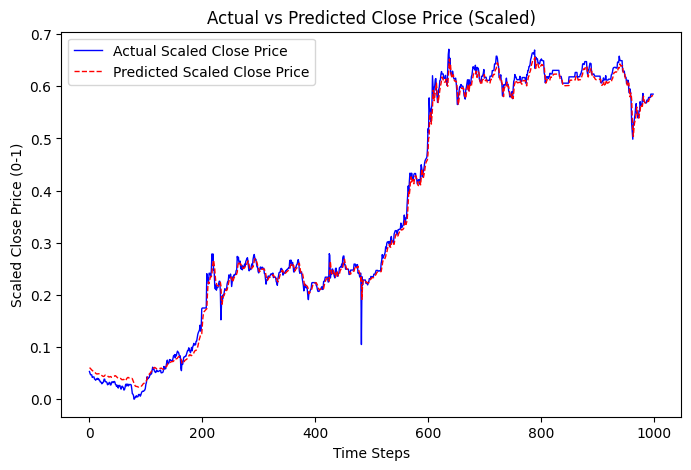

In [ ]:
# plot the given Raw Y_test_seq values and Raw Model Predictions:

import numpy as np
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(Y_test_seq[:1000], label="Actual Scaled Close Price", color="blue", linewidth=1)
plt.plot(test_predictions[:1000], label="Predicted Scaled Close Price", color="red", linestyle="dashed", linewidth=1)
# Labels and title
plt.xlabel("Time Steps")
plt.ylabel("Scaled Close Price (0-1)")
plt.legend()
plt.title("Actual vs Predicted Close Price (Scaled)")

# Show the plot
plt.show()
